# Anàlisi d'un dataset: _CAS KAGGLE_

Genís Córdoba i Ricart 1603639

*Aprenentatge Computacional*

### Taula de continguts

1. [Introducció](#1) 

    1.1 [Objectius](#11)
    
    1.2 [Metodologia](#12) 
    
    1.3 [Cites i webgrafia](#13)
    
    1.4 [Descripció del dataset](#14)
     
     <br>    
     
2. [Data mining](#2)

    2.1 [Preparació del dataset i tractament de les dades d'entrada](#21)
    
    2.2 [Preparació del dataset i neteja per a regressió](#22)
     
     <br>    
     
3. [Pre-model training](#3)

    3.1 [Correlation matrix](#31)
    
    3.2 [Feature selection](#32)
    
    3.3 [One-hot encoding per les variables categòriques](#33)
    
    <br>    
    
4. [Model learning](#4)

    4.1 [Model tests](#41)
    
    4.2 [Regressió logística fent servir undersampling](#42)
    
    4.2.1[Reducció de dimensionalitat amb PCA](#421)
    
    4.3 [Decission tree model](#43)
    
    4.4 [4.4 Random Forest model](#44)
    
     <br>    
     
5. [Resultats i anàlisi de les mètriques](#5)
 <br>    

<a id="1"></a>
# 1- Introducció
El dataset que tractarem tracta sobre accidents de cotxe als 49 estats d'Estats Units d'Amèrica del febrer del 2016 fins al desembre del 2021.
<a id="11"></a>
## 1.1 Objectius
El principal objectiu és de reconèixer quins són els factors que afecten principalment la severitat d'un accident. A més, farem una anàlisi de les dades per tal de respondre diferents preguntes sobre a què es deu un accident, quins dies succeeixen més accidents, a quins llocs passen més sinistres, a prop de quins objectes freqüents dels carrers n'ocurreixen més...
També, intentarem fer diferents models per tal de predir la severitat dels accidents. D'aquests models, triarem el que compleixi unes mètriques que posteriorment descriurem.
<a id="12"></a>
## 1.2 Metodologia
Primer farem *data cleaning* per tal de detectar i corregir les dades que estiguin corruptes o que faltin. Seguidament farem una primera anàlisi de les dades i donarem resposta a algunes de les preguntes que hem formulat anteriorment. Després, seleccionarem la nostra variable objectiu i utilitzarem mètodes de resampleig per balencejar les nostres dades. Finalment, entrenarem diferents models i farem les prediccions corresponents.
<a id="13"></a>
## 1.3 Cites i webgrafia

* YangMao, JunZhang, GlennRobbins, KathyClarke, MiuLam, WilliamPickett, “<a href="https://www.researchgate.net/publication/13888972_Factors_affecting_the_severity_of_motor_vehicle_traffic_crashes_involving_young_drivers_in_Ontario"> Factors affecting severity of motor vehicle traffic crashes</a>”, 2011
* Jared Staver, “<a href="https://www.chicagolawyer.com/blog/weather-related-car-accidents-deadly-u-s-natural-disasters/"> Weather-Related Car Accidents More Deadly Than U.S. Natural Disasters</a>”, 2017
* Servei Català de Trànsit, Generalitat de Catalunya. “<a href="https://cit.transit.gencat.cat/cit/AppJava/views/incident_volant.xhtml">Accidents deguts a condicions meteorològiques.</a>”, 2022.
* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “<a href="https://arxiv.org/abs/1906.05409">A Countrywide Traffic Accident Dataset.</a>”, 2019.


* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "<a href="https://arxiv.org/abs/1909.09638">Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.</a>" In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

* Oversampling vs. Undersampling, Machine learining,“<a href="https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/"> How to Combine Oversampling and Undersampling for Imbalanced Classification .</a>” , 2020

<a id="14"></a>
## 1.4 Descripció del dataset

Es tracta d'un dataset sobre accidents de trànsit a tot el país, que cobreix els 49 estats dels EUA. Les dades d'accidents es recullen des del febrer del 2016 fins al desembre del 2021, mitjançant diverses API que proporcionen dades d'incidents (o esdeveniments) de trànsit en streaming. Aquestes API transmeten dades de trànsit capturades per una varietat d'entitats, com ara els departaments de transport dels Estats Units i l'estat, les agències d'aplicació de la llei, les càmeres de trànsit i els sensors de trànsit dins de les xarxes de carreteres. Actualment, hi ha uns 2 milions de registres d'accidents. El dataset ha estat extret de la següent adreça del web *Kaggle*: https://www.kaggle.com/sobhanmoosavi/us-accidents

Contingut del dataset:

**Atributs de tràfic (12)**:

* **ID**: Identificador únic per cada accident.

* **Severity**: Mostra la gravetat de l'accident, un número entre 1 i 4, on 1 indica el menor impacte en el trànsit (és a dir, retard curt com a conseqüència de l'accident) i 4 indica un impacte significatiu en el trànsit (és a dir, retard llarg).

* **Start_Time**: Mostra l'hora d'inici de l'accident a la zona horària local.

* **End_Time**: Mostra l'hora de finalització de l'accident a la zona horària local.

* **Start_Lat**: Mostra la latitud en coordenades GPS del punt d'inici.

* **Start_Lng**: Mostra la longitud en coordenades GPS del punt d'inici.

* **End_Lat**: Mostra la latitud en coordenades GPS del punt final.

* **End_Lng**: Mostra la longitud en coordenades GPS del punt final.

* **Distance(mi)**: La longitud de l'extensió de la carretera afectada per l'accident.

* **Description**: Mostra una descripció "natural" de l'accident.

**Atributs d'adreça (9)**:

* **Number**: Mostra el número del carrer al camp d'adreça.

* **Street**: Mostra el nom del carrer al camp d'adreça.

* **Side**: Mostra el lloc relatiu del carrer el qual va ocòrer l'accident (right/left) 

* **City**: Mostra la ciutat al camp d'adreça.

* **County**: Mostra el comtat al camp d'adreça.

* **State**: Mostra l'estat al camp d'adreça.

* **Zipcode**: Mostra el codi postal al camp d'adreça.

* **Country**: Mostra el país al camp d'adreça.

* **Timezone**: Mostra la zona horària en funció de la ubicació de l'accident (est, centre, etc.).

**Atributs del temps (11)**:

* **Airport_Code**: Indica una estació meteorològica de l'aeroport que és la més propera a la ubicació de l'accident.

* **Weather_Timestamp**: Mostra la marca de temps del registre d'observació meteorològica (en hora local).

* **Temperature(F)**: Mostra la temperatura (en Fahrenheit).

* **Wind_Chill(F)**: Mostra el fred del vent (en Fahrenheit).

* **Humidity(%)**: Mostra la humitat (en percentatge).

* **Pressure(in)**: Mostra la pressió de l'aire (en polzades).

* **Visibility(mi)**: Mostra la visibilitat (en milles).

* **Wind_Direction**: Mostra la direcció del vent.

* **Wind_Speed(mph)**: Mostra la velocitat del vent (en milles per hora).

* **Precipitation(in)**: Mostra la quantitat de precipitació en polzades, si n'hi ha.

* **Weather_Condition**: Mostra les condicions meteorològiques (pluja, neu, tempesta, boira, etc.).

**Atributs PDI: *Punts d'interés* (13)**:

* **Amenity**: Una anotació de punt d'interès (PDI) que indica la presència d'equipaments en una ubicació propera.

* **Bump**: Una anotació de PDI que indica la presència d'una baixada de velocitat o una gepa en una ubicació propera.

* **Crossing**:Una anotació de PDI que indica la presència d'un encreuament en una ubicació propera.

* **Give_Way**: Una anotació de PDI que indica la presència del signe give_way en una ubicació propera.

* **Junction**: Una anotació de PDI que indica la presència d'una unió en una ubicació propera.

* **No_Exit**: Una anotació de PDI que indica la presència d'un rètol no_exit en una ubicació propera.

* **Railway**: Una anotació de PDI que indica la presència d'un ferrocarril en un lloc proper.

* **Roundabout**: Una anotació de PDI que indica la presència d'una rotonda en un lloc proper.

* **Station**: Una anotació de PDI que indica la presència d'una estació (autobús, tren, etc.) en un lloc proper.

* **Stop**: Una anotació de PDI que indica la presència d'un senyal d'aturada en una ubicació propera.

* **Traffic_Calming**: Una anotació de PDI que indica la presència de trafic_calming en una ubicació propera.

* **Traffic_Signal**: Una anotació de PDI que indica la presència de traffic_signal en una ubicació propera.

* **Turning_Loop**: Una anotació de PDI que indica la presència de turning_loop en una ubicació propera.

**Atributs relacionats amb el dia que feia (4)**:

* **Sunrise_Sunset**: Mostra el període del dia (és a dir, dia o nit) en funció de la sortida o la posta de sol.

* **Civil_Twilight**: Mostra el període del dia basat en el crepuscle civil.

* **Nautical_Twilight**: Mostra el període del dia basat en el crepuscle nàutic.

* **Astronomical_Twilight**: Mostra el període del dia basat en el crepuscle astronòmic.

<a id="2"></a>
# 2- Data mining i EDA
En aquesta primera secció farem una primera visió de les dades, netejarem les dades i farem una primera anàlisi d'aquestes.

Els principals objectius són:
* Entendre les dades del dataset. 
* Netejar les dades.
* Establir variables objectius.
* Seleccionar els atributs més importants per la variable objectiu.

EDA fa referència al procés de fer una investigació inicial en les dades per tal de descobrir patrons, veure anomalies, comprovem allò que hem assumit a partir de gràfics i taules.

<a id="21"></a>
## 2.1 Preparació del dataset i tractament de les dades d'entrada

Primerament fem els imports corresponents per tal de treballar amb les dades després:

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.graph_objects as go
from collections import Counter

#per model learning
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import PrecisionRecallDisplay, classification_report, confusion_matrix, classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.decomposition import PCA

### Primera visualització de les dades:

Carraguem el dataset:

In [2]:
# carreguem el dataset
df = pd.read_csv('./US_Accidents_Dec21_updated.csv')

Vegem el tipus de dades de tots els atributs del nostre dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Vegem la mida del nostre dataset:

In [4]:
df.shape

(2845342, 47)

Mirem, per cada columna, quants valors numèrics diferents hi ha:

In [5]:
df.select_dtypes(include=np.number).nunique()

Severity                   4
Start_Lat            1093618
Start_Lng            1120365
End_Lat              1080811
End_Lng              1105404
Distance(mi)           14165
Number                 46402
Temperature(F)           788
Wind_Chill(F)            897
Humidity(%)              100
Pressure(in)            1068
Visibility(mi)            76
Wind_Speed(mph)          136
Precipitation(in)        230
dtype: int64

### Primers tractament de les dades:

Mirem quants valors ``NULL`` té el nostre dataset:

In [6]:
df.isnull().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

Percentatge de columnes de valors ``NULL`` major que zero:

In [7]:
per_of_missing_val_in_each_col = (df.isnull().sum().sort_values(ascending=False)/len(df))*100
col_with_missing_val = per_of_missing_val_in_each_col[per_of_missing_val_in_each_col>0]
col_with_missing_val

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

Text(0, 0.5, 'Columnes')

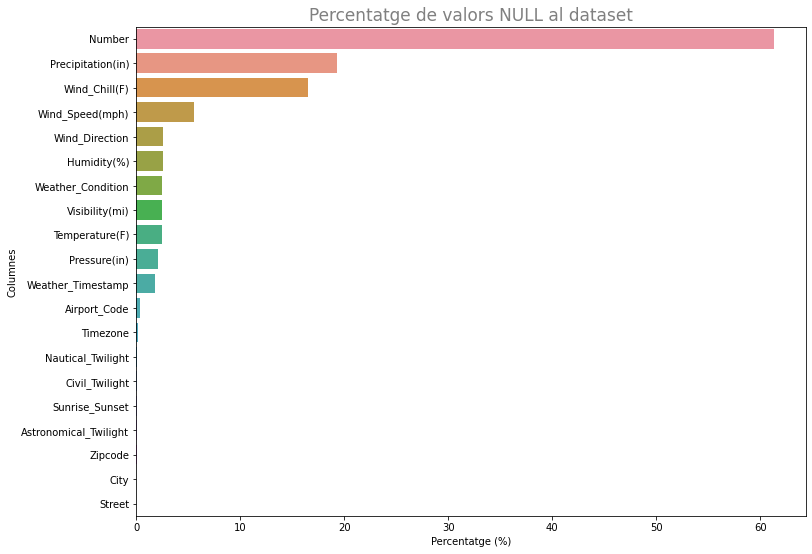

In [8]:
plt.figure(figsize=(12,9))
sns.barplot(y=col_with_missing_val.index, x=col_with_missing_val)
plt.title("Percentatge de valors NULL al dataset",size=17,color="GREY")
plt.xlabel('Percentatge (%)')
plt.ylabel('Columnes')

Observem que la columna *number* té un 61,29 % de valors ``NULL`` (podem fer un drop de la columna)

In [9]:
df = df.drop(['Number','Wind_Chill(F)'],axis=1)

La variable *Wind_Chill(F)* la podem eliminar ja que la temperatura del vent no ens influirà a l'hora de fer les prediccions.

Arreglem el format de l'hora de l'inici i fi de l'accident:


In [10]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

df = df.drop(["Weather_Timestamp"], axis=1)

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

Start_Time  Year  Month  Weekday  Day  Hour  Minute
0 2016-02-08 00:37:08  2016      2        0   39     0    37.0
1 2016-02-08 05:56:20  2016      2        0   39     5   356.0
2 2016-02-08 06:15:39  2016      2        0   39     6   375.0
3 2016-02-08 06:51:45  2016      2        0   39     6   411.0
4 2016-02-08 07:53:43  2016      2        0   39     7   473.0

Afegim una nova columna (feature) anomenada **Precipitation_NA** pels valors de **Precipitation(in)** que no tenen dades, ho indicarem afegint una columna amb uns i zeros segons si hi ha dades o no ja que possiblement aquesta feature sigui important a l'hora de fer la predicció:

In [11]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

Precipitation(in)  Precipitation_NA
0               0.00                 0
1               0.02                 0
2               0.02                 0
3               0.00                 1
4               0.01                 0
5               0.00                 1

Mirem quines ciutats són a les que hi ha hagut més accidents:

In [12]:
df['City'].nunique()

11681

Hi ha un total de 11681 ciutats al dataset.


Text(0, 0.5, 'Ciutat')

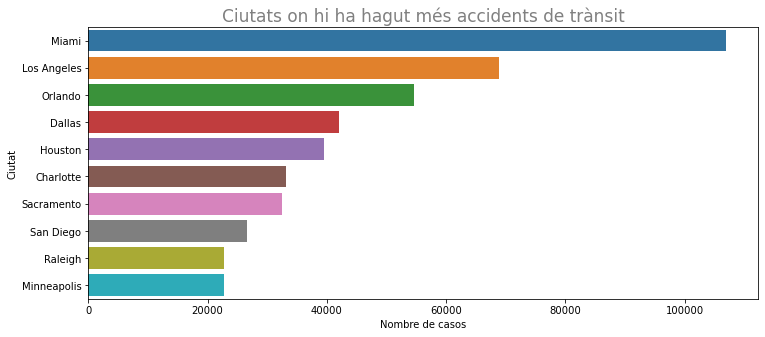

In [13]:
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(y=top_cities.index, x=top_cities)
plt.title("Ciutats on hi ha hagut més accidents de trànsit",size=17,color="grey")
plt.xlabel('Nombre de casos')
plt.ylabel('Ciutat')

Text(0.5, 1.0, 'Percentatges de les ciutats on hi ha hagut més accidents de trànsit')

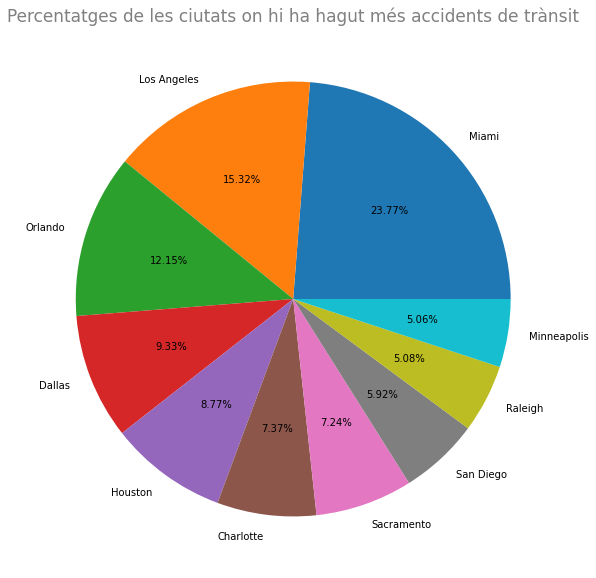

In [14]:
plt.figure(figsize=(14,10))
plt.pie(top_cities,labels=top_cities.index,autopct='%.2f%%')
plt.title("Percentatges de les ciutats on hi ha hagut més accidents de trànsit",size=17,color="grey")

Veiem que a la ciutat de Miami és on hi ha hagut més accidents reportats.

En el ``df.info()`` observem que totes les columnes que contenen informació de tipus boleana indiquen quins objectes viaris es trobaben prop dels diferents sinistres, llavors observem a on se n'ha produït més:

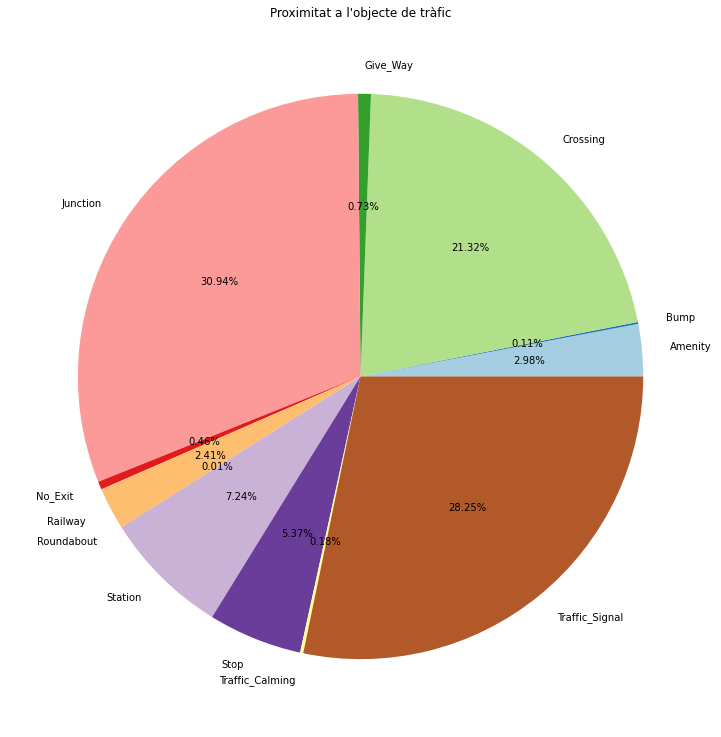

In [15]:
boolcols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[boolcols]
booldfsum = booldf.sum(axis=0)
booldfsum = booldfsum.loc[~(booldfsum==0)]
booldfsum.plot.pie(figsize=(13,13), colormap = "Paired",autopct='%.2f%%')
plt.ylabel("")
plt.title("Proximitat a l'objecte de tràfic");

Veiem que en les interseccions, en els encreuaments amb senyals de trànsit i llocs amb passos de peatons són els llocs on es produeixen més accidents.

Text(0, 0.5, 'N. accidents')

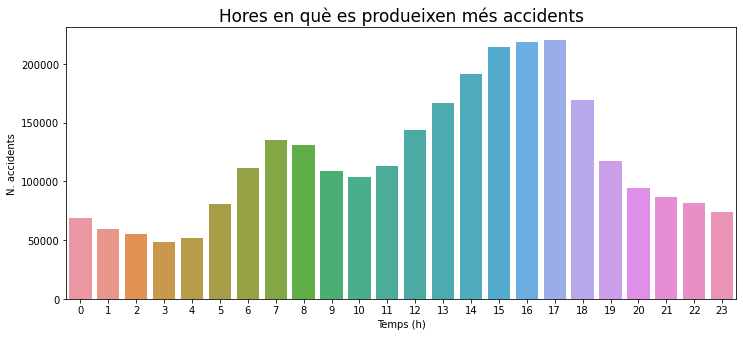

In [16]:
plt.figure(figsize=(12,5))
time_max_acc = df.Start_Time.dt.hour.value_counts()
sns.barplot(y=time_max_acc, x=time_max_acc.index)
plt.title("Hores en què es produeixen més accidents",size=17)
plt.xlabel('Temps (h)')
plt.ylabel('N. accidents')

La major part dels accidents passen entre les 14h i les 18h. També s'observa una punxa entre les 7h i 8h. Aquestes hores són les hores que la gent torna i va a treballar, és a dir, quan hi ha més moviment de cotxes.

Text(0, 0.5, "N. d'accidents")

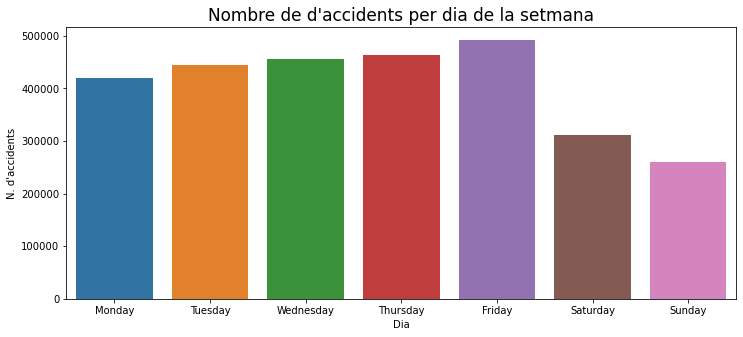

In [17]:
weekday_max_acc=df.Start_Time.dt.day_name().value_counts()
plt.figure(figsize=(12,5))
sns.barplot(y=weekday_max_acc, x=weekday_max_acc.index,order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Nombre de d'accidents per dia de la setmana",size=17)
plt.xlabel('Dia')
plt.ylabel("N. d'accidents")

Veiem que l'inici del cap de setmana (divendres) es produeixen més sinistres.

Text(0, 0.5, "N. d'accidents")

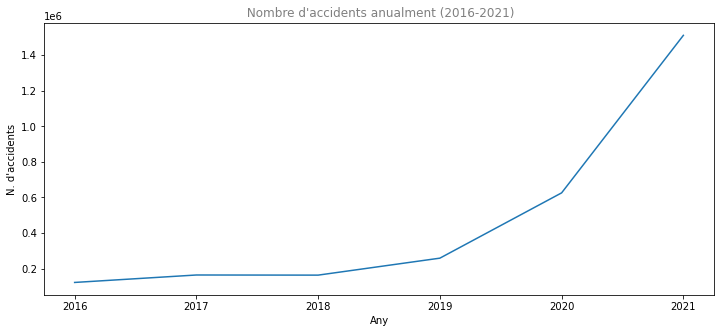

In [18]:
year_max_acc=df.Start_Time.dt.year.value_counts()
plt.figure(figsize=(12,5))
sns.lineplot(data=year_max_acc)
plt.title(" Nombre d'accidents anualment (2016-2021)",color="grey")
plt.xlabel('Any')
plt.ylabel("N. d'accidents")

El nombre d'accidents reportats s'ha mantingut el mateix durant els anys 2016 - 2018 però a partir del 2019 no ha parat d'augmentar el nombre de sinistres documentats. És possible també que les fonts que recollien dades del 2016 al 2018 canviessin o no les recollissin totes. El quasi exponencial augment de sinistres a partir de l'any 2018-2019 ens fa sospitar de la fiabilitat de les dades. Posteriorment, quan preparem la variable objectiu ho tractarem.

Text(0, 0.5, 'Severitat')

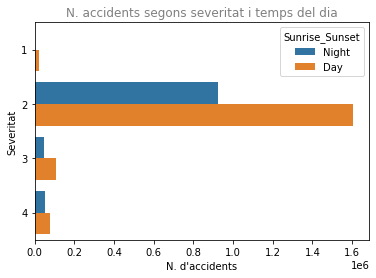

In [19]:
sns.countplot(y='Severity',data=df,hue='Sunrise_Sunset')
plt.title("N. accidents segons severitat i temps del dia",color="grey")
plt.xlabel("N. d'accidents")
plt.ylabel("Severitat")

La majoria d'accidents occórren durant el dia, en comparativa, i en tots els nivells de severitat el recompte diürn és més alt.

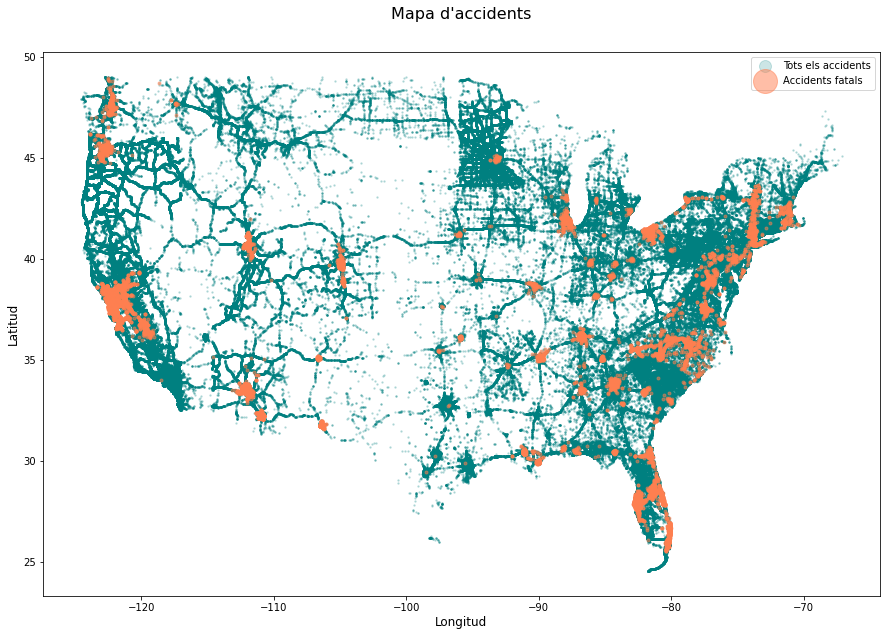

In [20]:
df_4 = df[df.Severity==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='Tots els accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents fatals')
plt.legend(markerscale=8)
plt.xlabel('Longitud', size=12, labelpad=3)
plt.ylabel('Latitud', size=12, labelpad=3)
plt.title("Mapa d'accidents", size=16, y=1.05)
plt.show()

Podem observar la distribució dels accidents. Veiem que els més severs se situen sobretot a les grans ciutats que són els llocs on hi ha més moviment de cotxes.

In [21]:
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Nombre d'accidents per cada Estat", geo_scope="usa")
fig.show()

<a id="22"></a>
## 2.2 Preparació del dataset i neteja per a regressió 

A continuació prepararem el dataset per tal de poder fer la regressió amb les dades adients processades adequadament. En aquest apartat mirarem si hi ha columnes que no aporten informació, tractarem les *features* categòriques, els *NaNs* i eliminarem aquelles columnes de què en podem prescendir.

En l'anàlisi EDA fet anteriorment, ja n'hem tret una que més d'un 50% dels seus valors eren de tipus ``NULL``. Tot seguit, vegem quines no ens aporten informació rellevant per tal de fer la predicció sobre què provoca que un accident sigui més o menys sever.

### Eliminar valors no influents
Tot accident està representat únicament per una *feature* anomenada *key-feature* la qual és la **ID** de l'accident. Aquesta només és ens l'identifica únicament i no ens aporta cap altre tipus d'informació sobre els accidents en si.

In [22]:
df = df.drop(['ID'],axis=1)

La variable **Description** aporta informació detallada sobre l'accident un cop aquest ha estat reportat, o sigui, quan aquest ja ha succeït. A més, de la descripció que s'hi fa, ja s'han extret prèviament els elements PDI i representats en diferents variables booleanes (com hem vist abans). Podem fer un *drop* d'aquesta columna.

El mateix passa amb les variables temporals que indiquen quan s'ha acabat l'accident: **End_Time** (disposem del temps quan va succeeir l'accident a la variable **Start_Time** i amb la *feature* **End_Lat** i **End_Lng** (disposem del lloc on va succeir l'accident a les variables **Start_Lat** i **Start_Lng**). De la mateixa manera, **Distance(m)** indica la longitud de la carretera afectada un cop ha passat l'accident. Totes aquestes variables no poden ser bones predictores ja que només es recullen un cop hi ha hagut l'accident. Així que també fem un *drop* d'aquestes:

In [23]:
df = df.drop(['Description','Distance(mi)', 'End_Time','End_Lat', 'End_Lng'], axis=1)

### Variables categòriques
Analitzem les variables categòriques. Primer de tot, vegem quines *features* tenim que siguin de tipus categòric:

In [24]:
categorical_features = df.select_dtypes(exclude=["number","datetime"])
categorical_cols = df.select_dtypes(exclude=["number","datetime"]).columns.to_list()
categorical_cols

['Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Wind_Direction',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

Estudiem el nombre de classes que té cada variable:

In [25]:
print(categorical_features.nunique())

Street                   159651
Side                          3
City                      11681
County                     1707
State                        49
Zipcode                  363085
Country                       1
Timezone                      4
Airport_Code               2004
Wind_Direction               24
Weather_Condition           127
Amenity                       2
Bump                          2
Crossing                      2
Give_Way                      2
Junction                      2
No_Exit                       2
Railway                       2
Roundabout                    2
Station                       2
Stop                          2
Traffic_Calming               2
Traffic_Signal                2
Turning_Loop                  1
Sunrise_Sunset                2
Civil_Twilight                2
Nautical_Twilight             2
Astronomical_Twilight         2
dtype: int64


És evident que, la variable **Country** no aporta informació rellevant ja que només té una classe: "Estats Units", fet que és evident ja que estem analitzant un dataset sobre accidents de cotxe als Estats Units. El mateix passa amb la variable **Turning_Loop**.

In [26]:
df = df.drop(["Country","Turning_Loop"],axis=1)

De la taula anterior, també sorprén la quantitat de classes que té la variable **Wind_Direction**. Que n'hi hagi 24 de diferents fa sospitar que alguna cosa no va bé. O bé s'ha volgut precisar molt en la direcció del vent o bé hi ha classes repetides amb diferents noms. De qualsevol manera, analitzem-les més detalladament:

In [27]:
print(df["Wind_Direction"].unique())

['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' nan 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N'
 'E']


Veiem que hi ha duplicitat en les classes **Calm/CALM** , **VAR/Variable**, **N/North**, **S/South**, **E/East**, **W/West** i que hi ha classes com **ESE** que significa que la direcció del vent està entre **E** (Est) i **SE** (Sud-Est).

El que farem serà:
1. Eliminar la duplicitat de classes per les classes repetides
2. Simplificar les classes del tipus **ESE**, per exemple, pel tipus **E**  i així amb les altres classes que compleixen les mateixes condicions. 

### Eliminar la duplicitat de classes

In [28]:
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[df['Wind_Direction']=='North','Wind_Direction'] = 'N'
df.loc[df['Wind_Direction']=='South','Wind_Direction'] = 'S'
df.loc[df['Wind_Direction']=='East','Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='West','Wind_Direction'] = 'W'

### Simplificació de classes

In [29]:
df.loc[(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'

Hem reduït el nombre de classes de manera considerable fent-ho més entenedor i més fàcil d'utilitzar a l'hora de fer les regressions. Ara tenim 11 classes diferents de les 24 que teníem abans:

In [30]:
print(df["Wind_Direction"].unique())

['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' nan 'VAR' 'NE']


Seguint amb les variables temporals, estudiem la variable **Weather_Condition** que té 127 classes diferents. Segons un *paper*  de l'advocat *Jared Staver* al seu blog al web <a href="https://www.chicagolawyer.com/blog/weather-related-car-accidents-deadly-u-s-natural-disasters/"> www.chicagolawyer.com</a> les condicions meteorològiques adverses a la conducció que causen més accidents en les carreteres dels Estats Units no són els grans desastres naturals com podrien ser els tornados o altres desastres naturals tan parlats pels medis de telecomunicació sinó que la majoria dels accidents de cotxe succeeixen quan el sól és moll, quan plou, quan hi ha neu o quan hi ha boira.

Veiem quin els tipus de descripció d'aquesta variable:

In [31]:
temps = np.unique(np.array(re.split(
    "separador|\s/\s", 'separador'.join(df['Weather_Condition'].dropna().unique().tolist())))).tolist()
print(temps)

['Blowing Dust', 'Blowing Sand', 'Blowing Snow', 'Blowing Snow Nearby', 'Clear', 'Cloudy', 'Drifting Snow', 'Drizzle', 'Drizzle and Fog', 'Dust Whirls', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Duststorm', 'Fair', 'Fog', 'Freezing Drizzle', 'Freezing Rain', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy Blowing Snow', 'Heavy Drizzle', 'Heavy Freezing Drizzle', 'Heavy Freezing Rain', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Snow', 'Heavy Snow with Thunder', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain', 'Heavy Thunderstorms and Snow', 'Heavy Thunderstorms with Small Hail', 'Ice Pellets', 'Light Blowing Snow', 'Light Drizzle', 'Light Fog', 'Light Freezing Drizzle', 'Light Freezing Fog', 'Light Freezing Rain', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Rain with Thunder', 'Light Sleet', 'Light Snow', 'Light Snow Shower', 'Light Snow Showers', 'Light Snow and Sleet', 'Light Snow wi

De la mateixa manera que s'ha fet amb la descripció de la direcció del vent, simplifiquem el nombre de classes. Per exemple, podem agrupar sota el mateix nom les classes: *Heavy Rain*, *Rain Shower*, *Heavy Thunderstorms*, *Heavy T-Storm* i *Heavy Thunderstorms*. El mateix amb les que indiquen *Heavy Snow* i moltes d'altres. Fent una ullada ràpida a la llista anterior les descripcions que podem agrupar són les que contenen les paraules:
* **Rain** $\leftarrow$ Rain, storm, Thunder in the Vicinity, Light Rain Showers
* **Heavy_Rain** $\leftarrow$ Heavy Rain, Rain Shower, Heavy T-Storm, Heavy Thunderstorms
* **Snow** $\leftarrow$ Snow, Sleet, Ice
* **Heavy_Snow** $\leftarrow$ Heavy Snow, Heavy Sleet, Heavy Ice Pellets, Snow Showers, Squalls
* **Cloud** $\leftarrow$ Cloud, Overcast

In [32]:
temps = ['Rain','Heavy_Rain','Snow','Heavy_Snow','Cloud']
df[temps[0]] = np.where(df['Weather_Condition'].str.contains('Rain|storm|Thunder in the Vicinity|Light Rain Showers', case=False, na = False), True, False)
df[temps[1]] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df[temps[2]] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df[temps[3]] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df[temps[4]] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)

Les situacions de boira i de cel serè també les hem d'afegir: 

In [33]:
temps.extend(["Fog","Clear"])
df[temps[-2]] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)
df[temps[-1]] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)

Pels valors que són ``NULL`` assignem ``NA`` i finalment fem un drop de la columna **Weather_Condition**:

In [34]:
for i in temps:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
    df[i] = df[i].astype('bool')

df.loc[:,['Weather_Condition'] + temps]

df = df.drop(['Weather_Condition'], axis=1)

### Eliminar valors "NaNs"
Hem vist que el nombre de valors que falten en algunes *features* són molt més petits en comparació amb la mostra total. És convenient fer un *drop* de les files amb valors que falten en aquestes columnes.

In [35]:
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

Ara totes les columnes només tenen una petita porció de dades sense emplenar. Aquelles columnes amb valors ``NA`` de variables categòriques els emplenarem amb els valors que apareixen més:

In [36]:
var_cat = temps + ['Wind_Direction']
print("Nombre de valors que encara falten: ")
for i in var_cat:
    df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
    print(i + " : " + df[i].isnull().sum().astype(str))

Nombre de valors que encara falten: 
Rain : 0
Heavy_Rain : 0
Snow : 0
Heavy_Snow : 0
Cloud : 0
Fog : 0
Clear : 0
Wind_Direction : 34222


Veiem que els valors que no s'ha pogut emplenar amb la majoria és la **Wind_Direction** segurament perquè s'ha tractat anteriorment. Finalment, decidim fer un altre ``.dropna()`` de les features:

In [37]:
df = df.dropna(subset=var_cat)

Totes aquelles que contenen valors numèrics continus, com poden ser la **Humidity(%)** o la variable **Temperature(F)** els podem emplenar amb la mitjana de la humitat / temperatura (per aquests exemples) que van tenir lloc en el mes de l'accident de l'estació meteorològica associada a cada accident. Les variables temporals contínues que "emplenarem" són: **Humidity(%), Temperature(F), Pressure(in), Visibility(mi) i Wind_Speed(mph)**.

In [38]:
var_temporals=['Humidity(%)', 'Temperature(F)','Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)']
print("Nombre de valors que encara falten: ")
for i in var_temporals:
    df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.median()))
    print( i + " : " + df[i].isnull().sum().astype(str))

Nombre de valors que encara falten: 
Humidity(%) : 24
Temperature(F) : 21
Pressure(in) : 31
Visibility(mi) : 2314
Wind_Speed(mph) : 1946


Veiem que hi ha pocs valors que faltin. Fem un ``.dropna()`` per aquestes *features*:

In [39]:
df = df.dropna(subset=var_temporals)

Fem un *drop* dels valors duplicats:

In [40]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 2796569
Number of rows after drop of duplicates: 2566629


### Tractament de la variable objectiu i *exploratory analisis* d'aquesta
La variable objectiu és el nivell de severitat de l'accident. Com ja hem mencionat anteriorment n'hi ha de quatre tipus. Segons l'article a www.researchgate.net (adjuntat a la webgrafia) els de tipus 1, 2 i 3 són accidents sense víctimes mortals amb ferides lleus. Els accidents de tipus 4 són accidents on els accidentats han mort o bé en l'accident o bé abans de 30 dies després de l'accident. 

Crec necessari, a part de per tal d'agilitzar la feina, d'agrupar els tres primers tipus de severitats i crear una variable booleana anomenada **Severity4** que indiqui si el grau de l'accident ha estat 4 o no. Tot seguit, fem l'agrupació, creem la variable **Severity4** i fem un drop de la columna **Severity**:

In [41]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)

<a id="3"></a>
# 3. Pre-model training

Un cop hem netejat el dataset, preparem-lo per tal de després poder aplicar diferents models per fer les prediccions. Els objectius principals d'aquest apartat són:
* Veure correlacions i patrons en les diferents *features*
* Processar les dades que utilitzarem per fer la regressió
* Definir els diferents conjunts d'aprenentatge
* Aplicar models bàsics de la llibreria ``scikit-learn``
<a id="31"></a>
## 3.1 Correlation matrix
En el següent apartat veurem la matriu de correlació que ens dóna una idea de com de correlacionades estan totes les *features* entre elles en forma de mapa de calor. Així, veurem quines de les variables estan altament correlacionades i de quines en podrem prescindir.

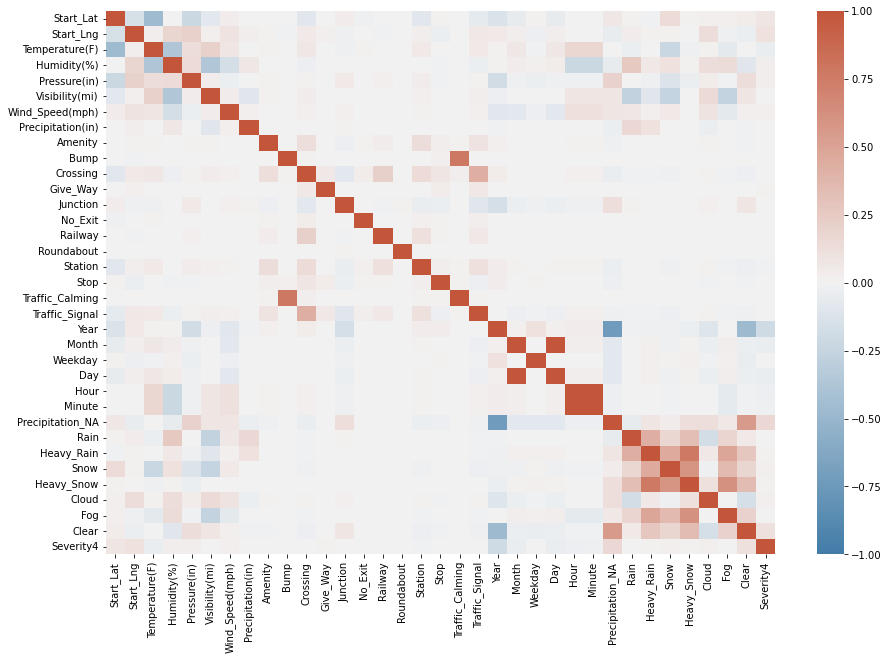

In [42]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap= sns.diverging_palette(240, 20, sep=1, as_cmap=True))
plt.gca().patch.set(hatch="X")
plt.show()

Fent una primera ullada veiem dues principals àrees colorejades. Una amb correlacions altes (a baix a la dreta) i una altra amb anticorrelacions (dalt a l'esquerra). També veiem zones de variables amb correlacions no tan altes (baix esquerra).

Pel que fa a la primera zona mencionada, ens n'adonem que les variables sobre l'estat de la carretera causat per les condicions meteorològiques, les quals hem tractat abans, estan altament correlacionades. Té sentit: si plou i fa molta fred neva, de la mateixa manera que si no plou (variable **Clear**) la variable que mesura si no hi ha dades de pluja, **Precipitation_NA**, serà positiva.

Per contra del què podem pensar, que quan plou hi ha més accidents ja que hi ha menys visibilitat, aquesta variable és la que està més correlacionada amb la nostra variable objectiu: **Severity4** tot i que la correlació és molt feble. Les variables de temps com són **Hour**, **Day** i **Minute** també tenen un alt nivell de correlació entre elles.

Pel que fa a la segona zona mencionada, veiem una alta anticorrelació de la variable **Temperature(F)** i la variable **Start_Lat** fet que té tot el sentit ja que ens diu que com més amunt ens trobem del mapa, més fred fa. També veiem que la humitat està anticorrelacionada amb la temperatura i amb la visibilitat de la carretera.

La nostra variable objectiu, a primera vista no presenta correlacions amb altres variables.

<a id="32"></a>
## 3.2 Feature selection
Tot seguit seleccionem les millors *features* de les quals el nostre model pot aprendre.

Amb les observacions fetes anteriorment amb la matriu de correlació i fent un raonament lògic sobre la importància de cada *feature*, farem un *drop* de les següents variables:

* **Start_Time**: ja que anteriorment ja l'hem descomposada per les features **Day, Month, Weekday**.
* **Street, County, State, Zipcode**: ja que només aporten informació sobre la ciutat en la qual va passar l'accident.
* **Timezone**: tampoc ens aporten informació rellevant per preveure el nivell de **Severity4**

I el mateix farem amb el seguit de *features* de la llista següent que no presenten correlació amb **Severity4**.

In [43]:
features_to_drop = [ "Start_Time","Street", "County", "State", "Zipcode", "Timezone",'Temperature(F)', 'Humidity(%)', 'Precipitation(in)', 'Precipitation_NA',
              'Clear','Cloud','Snow','Crossing','Junction','Railway','Month',
              'Hour', 'Day','Minute']
df = df.drop(features_to_drop, axis=1)

<a id="33"></a>
## 3.3 One-hot encoding per les variables categòriques

Per a les variables categòriques restants, aplicarem un one-hot encoding construïnt així una columna per cada registre de cada variable categòrica amb un 1 si el compleix i amb un 0 si no.

In [44]:
df = df.replace([True, False], [1,0])

cat = ['Side','Weekday']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

df_int = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_float = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df = pd.concat([df.select_dtypes(include=['uint8']),df_int,df_float],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566629 entries, 0 to 2845341
Data columns (total 27 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Side_R           uint8  
 1   Weekday_1        uint8  
 2   Weekday_2        uint8  
 3   Weekday_3        uint8  
 4   Weekday_4        uint8  
 5   Weekday_5        uint8  
 6   Weekday_6        uint8  
 7   Amenity          uint8  
 8   Bump             uint8  
 9   Give_Way         uint8  
 10  No_Exit          uint8  
 11  Roundabout       uint8  
 12  Station          uint8  
 13  Stop             uint8  
 14  Traffic_Calming  uint8  
 15  Traffic_Signal   uint8  
 16  Year             uint16 
 17  Rain             uint8  
 18  Heavy_Rain       uint8  
 19  Heavy_Snow       uint8  
 20  Fog              uint8  
 21  Severity4        uint8  
 22  Start_Lat        float32
 23  Start_Lng        float32
 24  Pressure(in)     float32
 25  Visibility(mi)   float32
 26  Wind_Speed(mph)  float32
dtypes: float32(5

<a id="4"></a>
# 4. Model Learning
Els objectius de la següent part són els següents:
* Entrenar models i fer predicció dels models per nous exemples
* Provar diferents models i ajustar-los adequadament
* Comparar els diferents models 

En aquesta secció aplicarem diferents models de regressió i també utilitzarem diferents *rensambling methods* per tal de balancejar el nostre model. Comencem definint el nostre conjunt d'entrenament i el nostre conjunt de test.



<a id="41"></a>
## 4.1 Model tests
Seguidament provarem diversos models per tal d'identificar quin és el que millor s'ajusta a la nostra tasca. Particularment farem servir els següents models:
* Regressió Logística
* Decision tree
* Random Forest

També farem una busca per trobar els millors hiperparàmetres per produir els millors resultats per a cada model. Finalment veurem quin dels models té millor rendiment utilitzant les següents mètriques:

* **Precision:** percentatge de valors que s'han classificat com a positius realment són positius.
* **Accuracy:** és el percentatge dels valors correctament classificats.
* **Recall:** indicador de quants valors positius són classificats correctament.

<a id="42"></a>
## 4.2 Regressió logística fent servir undersampling

El dataset és gran: vegem la distribució de les dues classes de la variable objectiu:

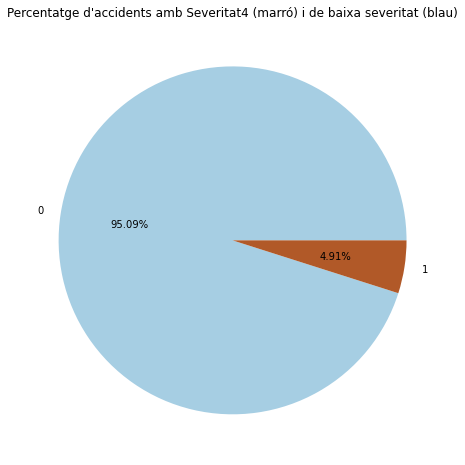

In [45]:
severity4_counts=df.Severity4.value_counts()
severity4_counts.plot.pie(figsize=(8,8), colormap = "Paired",autopct='%.2f%%')
plt.ylabel("")
plt.title("Percentatge d'accidents amb Severitat4 (marró) i de baixa severitat (blau)");

Observem que el percentatge d'accidents de severitat 4 és molt més petit que el percentatge de la resta. Això ens farà molt difícil l' *exploratory analysis*. Afortunadament, el nostre dataset és suficientment llarg que podem fer servir tècniques de *resampling* per balancejar la nostra *data*.

L'estrategia que utilitzarem serà la de triar exemples pel dataset transformat aleatòriament, anomenat: *random resampling*. L'enfocament principal per fer *random resampling* per la nostra *data* serà aplicar els mètodes *oversampling* que dupliquen exemples aleatòriament de la classe minoritària i l' *undersampling* que elimina aleatòriament exemples de la classe majoritària.

Llavors, el nivell de **Severity4** serà aleatòriament *undersampled* a un valor predeterminat i així aconseguir el mateix percentatge de mostres d'ambdues classes. No contemplem fer *oversampling* ja que el dataset és molt gran causaria overfitting al model.

In [46]:
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),dat[dat[col]==0].sample(n)], axis=0)

Per decidir el nombre de mostres pel qual fer l'undersampling, mirem quin és el valor de la nostra mostra minoritària i fem un undersampling de la classe majoritària a partir d'aquest valor.

In [47]:
severity4_counts=df.Severity4.value_counts()
severity4_counts

0    2440590
1     126039
Name: Severity4, dtype: int64

In [48]:
df_resampled = resample(df, 'Severity4', 50000)

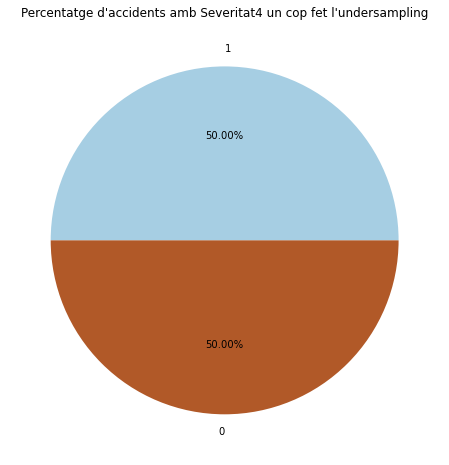

In [49]:
severity4_counts=df_resampled.Severity4.value_counts()
severity4_counts.plot.pie(figsize=(8,8), colormap = "Paired",autopct='%.2f%%',)
plt.ylabel("")
plt.title("Percentatge d'accidents amb Severitat4 un cop fet l'undersampling");

Ara que ja tenim el nostre dataset undersampled, apliquem **regressió logística**:

#### Split data
Separem a la variables **y** la *feature* objectiu i la resta de dades a **X**. Tot seguit, fem un split de les nostres dades amb la funció de ``sklearn``: *train_test_split()*:

In [50]:
X = df_resampled.drop('Severity4', axis=1)
y = df_resampled['Severity4']

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X, y, test_size=0.30, random_state=42)

Creem diccionaris per guardar els valors de les diferents mètriques per cada model:

In [51]:
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

Apliquem regressió logística:

In [52]:
lr = LogisticRegression(random_state=42, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid = GridSearchCV(lr, params, n_jobs=-1, verbose=5)
grid.fit(X_train_res, y_train_res)

print("Best parameters scores:")
print("Train score:", grid.score(X_train_res, y_train_res))
print("Validation score:", grid.score(X_test_res, y_test_res))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters scores:
Train score: 0.6391428571428571
Validation score: 0.6414333333333333


In [53]:
print("Default scores:")
lr.fit(X_train_res, y_train_res)
print("Train score:", lr.score(X_train_res, y_train_res))
print("Validation score:", lr.score(X_test_res, y_test_res))

Default scores:
Train score: 0.6386571428571428
Validation score: 0.6422333333333333


Posem les mètriques al diccionari per posteriorment poder fer la comparativa dels diferents models de regressió.

In [54]:
y_pred = lr.predict(X_test_res)

accuracy["Logistic Regression"] = accuracy_score(y_test_res, y_pred)
f1["Logistic Regression"] = f1_score(y_test_res, y_pred, average="macro")

print(classification_report(y_train_res, lr.predict(X_train_res)))
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64     35055
           1       0.64      0.64      0.64     34945

    accuracy                           0.64     70000
   macro avg       0.64      0.64      0.64     70000
weighted avg       0.64      0.64      0.64     70000

              precision    recall  f1-score   support

           0       0.64      0.65      0.64     14945
           1       0.65      0.64      0.64     15055

    accuracy                           0.64     30000
   macro avg       0.64      0.64      0.64     30000
weighted avg       0.64      0.64      0.64     30000



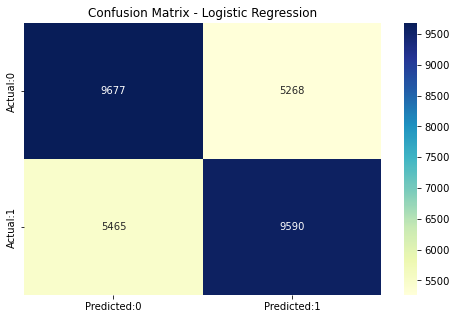

In [55]:
y_pred = lr.predict(X_test_res)
confmat = confusion_matrix(y_true=y_test_res, y_pred=y_pred)

index=['Actual:0','Actual:1']
columns=['Predicted:0','Predicted:1']
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Veiem que el model prediu bastant malament el nivell de severitat. Intentem reduir la dimensionalitat altra vegada i vegem a veure si millora.

<a id="421"></a>
#### Reducció de dimensionalitat aplicant PCA 

Per decidir quines variables són indispensables i quines podem negligir, aplicarem a la matriu de dades un procés de PCA que ens permetrà reduir l'espai d'aquesta matriu. 

És interessant realtzar aquesta reducció per aconseguir resultats més precisos i augentar la velocitat de còmput del model.

En el nostre cas, el primer que farem serà realitzar un procés de PCA per quedar-nos amb 10 variables principals i analitzarem el percentatge de variança explicada i tornarem a fer la regressió:

In [56]:
n=10
pca = PCA(n)
reduced_x = pca.fit_transform(X_test_res)
var_ratio = pca.explained_variance_ratio_

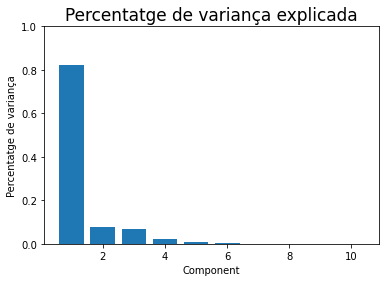

In [57]:
fig, ax = plt.subplots()
ax.bar(list(np.arange(1,n+1,1,dtype=list)),var_ratio)
ax.set_ylim([0,1])
ax.set_xlabel("Component")
ax.set_ylabel("Percentatge de variança")
ax = ax.set_title("Percentatge de variança explicada",fontsize=17)

Veiem que la primera component explica un 80% de la variança total i la segona i la tercera gairabé un 10%. Això significa que entre les tres primeres components principals es pot explicar gairebé amb totalitat la variança, de manera que podem concloure que obtindrem resultats prou bons fent la regressió només utilitzant les tres components principals. Anem a fer altra vegada regressió amb només les 3 components principals:

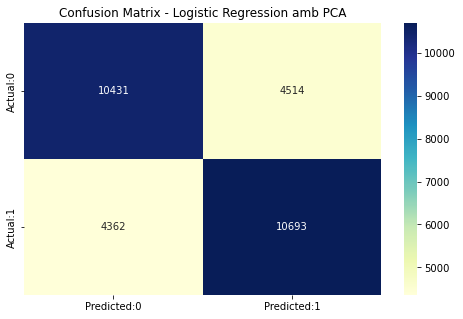

In [58]:
reducedtrain_x = pca.fit_transform(X_train_res)
lr.fit(reducedtrain_x, y_train_res)
y_pred = lr.predict(reduced_x)
confmat = confusion_matrix(y_true=y_test_res, y_pred=y_pred)

index=['Actual:0','Actual:1']
columns=['Predicted:0','Predicted:1']
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression amb PCA")
plt.show()

In [59]:
print(classification_report(y_test_res, y_pred))
dic2 = classification_report(y_test_res, y_pred,output_dict=True)

#metriques
accuracy["Logistic Regression"] = accuracy_score(y_test_res, y_pred)
f1["Logistic Regression"] = f1_score(y_test_res, y_pred, average="macro")
recall['Logistic Regression'] = dic2['macro avg']['recall']
precision['Logistic Regression'] = dic2['macro avg']['precision']

              precision    recall  f1-score   support

           0       0.71      0.70      0.70     14945
           1       0.70      0.71      0.71     15055

    accuracy                           0.70     30000
   macro avg       0.70      0.70      0.70     30000
weighted avg       0.70      0.70      0.70     30000



Veiem que l'accuracy ha millorat un cop aplicada la *Principal Component Analysis*. Vegem altres models:

<a id="43"></a>
## 4.3 Decission tree model
Tot seguit apliquem l'algorisme de Decission Tree en regressió i fem les prediccions corresponents.
#### Split data
Fem un resample de la nostres dades i després un split de les nostres dades amb la funció de ``sklearn``: *train_test_split()*:

In [60]:
df_resampled = resample(df, 'Severity4', 50000)

X = df_resampled.drop('Severity4', axis=1)
y = df_resampled['Severity4']

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X, y, test_size=0.30, random_state=42)

Un cop obtinguts els valors de *test* i de *train* declarem el nostre *Decission Tree* i fem la primera regressió. Imprimirem la train score i la validation score. 

In [61]:
dtc = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train_res, y_train_res)

print("Paràmetres amb millor score:")
print("Train score:", grid.score(X_train_res, y_train_res))
print("Validation score:", grid.score(X_test_res, y_test_res))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Paràmetres amb millor score:
Train score: 0.8536571428571429
Validation score: 0.7751666666666667


In [62]:
print("Default scores:")
dtc.fit(X_train_res, y_train_res)
print("Train score:", dtc.score(X_train_res, y_train_res))
print("Validation score:", dtc.score(X_test_res, y_test_res))

Default scores:
Train score: 0.9993571428571428
Validation score: 0.7658333333333334


Fem les prediccions del model i afegim als diccionaris les diferents mètriques:

In [63]:
y_pred = dtc.predict(X_test_res)

print(classification_report(y_train_res, dtc.predict(X_train_res),output_dict=False))
print(classification_report(y_test_res, y_pred,output_dict=False))

dic2 = classification_report(y_test_res, y_pred,output_dict=True)

#metriques
accuracy["Decision Tree"] = accuracy_score(y_test_res, y_pred)
f1["Decision Tree"] = f1_score(y_test_res, y_pred, average="macro")
recall['Decision Tree'] = dic2['macro avg']['recall']
precision['Decision Tree'] = dic2['macro avg']['precision']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35055
           1       1.00      1.00      1.00     34945

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     14945
           1       0.76      0.79      0.77     15055

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000



Veiem que l'accuracy del model utilitzant decission tree ha augmentat respecte al model anterior. Vegem tot seguit una matriu per veure com de bé s'han classificat.

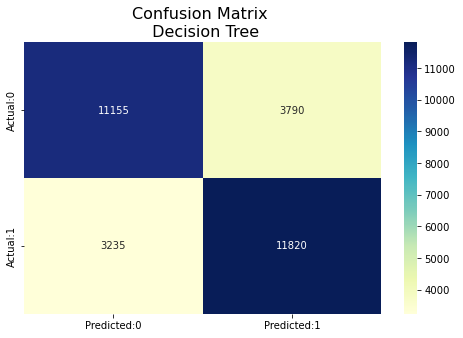

In [64]:
confmat = confusion_matrix(y_true=y_test_res, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix \n Decision Tree", fontsize=16)
plt.show()

Tot seguit fem una gràfica de les features més importants que ens permeten predir el nivell de *Severity* que tindrà un accident de trànsit:

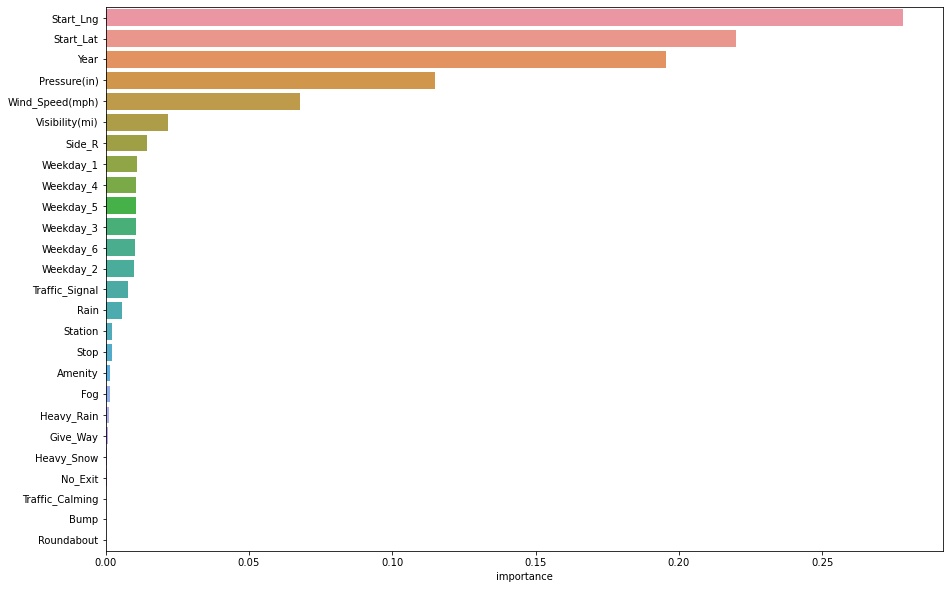

In [65]:
importances = pd.DataFrame(np.zeros((X_train_res.shape[1], 1)), columns=["importance"], index=X_train_res.columns)

importances.iloc[:,0] = dtc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

Veiem que les *features* més importants a l'hora de predir com de sever serà un accident són les coordenades, l'any (que realment no ens serveix per fer la predicció) i les variables de pressió, velocitat del vent i visibilitat. També veiem que dels dies de la setmana, els feiners són els que proporcionen més informació per la nostra causa. Tot plegat té bastant sentit: els dies feiners són dies amb força moviment d'automòbils (són bons predictors). Per altra banda, la posició espaial també té un sentit. Els accidents solen ocòrrer normalment en els mateixos llocs degut a diversos factors ja sigui l'estat de la carretera, la densitat de trànsit etc.  

<a id="43"></a>
## 4.4 Random Forest model
El nostre tercer model serà aplicar un Random Forest.
#### Split data
Tornem a fer un split de les nostres dades amb la funció de ``sklearn``: *train_test_split()*:

In [66]:
X = df_resampled.drop('Severity4', axis=1)
y = df_resampled['Severity4']

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X, y, test_size=0.30, random_state=42)

Seguidament, definim el classificador *Random Forest*, el nombre d'estimadors, el nombre màxim de *features*, que el deixarem en auto i després aplicarem l'arrel quadrada. 

In [67]:
clf_base = RandomForestClassifier()
grid = {'n_estimators': [10, 50, 100],
        'max_features': ['auto','sqrt']}
clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_rf.fit(X_train_res, y_train_res)
y_pred = clf_rf.predict(X_test_res)

dic2 = classification_report(y_test_res, y_pred,output_dict=True)

#metriques
accuracy["Random Forest"] = accuracy_score(y_test_res, y_pred)
f1["Random Forest"] = f1_score(y_test_res, y_pred, average="macro")
recall['Random Forest'] = dic2['macro avg']['recall']
precision['Random Forest'] = dic2['macro avg']['precision']

print (classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     14945
           1       0.81      0.83      0.82     15055

    accuracy                           0.82     30000
   macro avg       0.82      0.82      0.82     30000
weighted avg       0.82      0.82      0.82     30000



Veiem que l'*acuracy* ha millorat respecte els altres dos models. Vegem seguidament la matriu amb els falsos positius, els falsos negatius, els vertaders positius i els vertaders negatius.

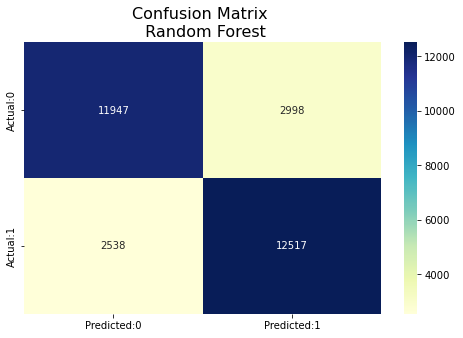

In [68]:
confmat = confusion_matrix(y_true=y_test_res, y_pred=y_pred)

accuracy["Random Forest"] = accuracy_score(y_test_res, y_pred)
f1["Random Forest"] = f1_score(y_test_res, y_pred, average="macro")

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix \n Random Forest", fontsize=16)
plt.show()

Cada cop aconseguim predir amb més exectitud. No obstant la precisió no és gaire bona (80%).

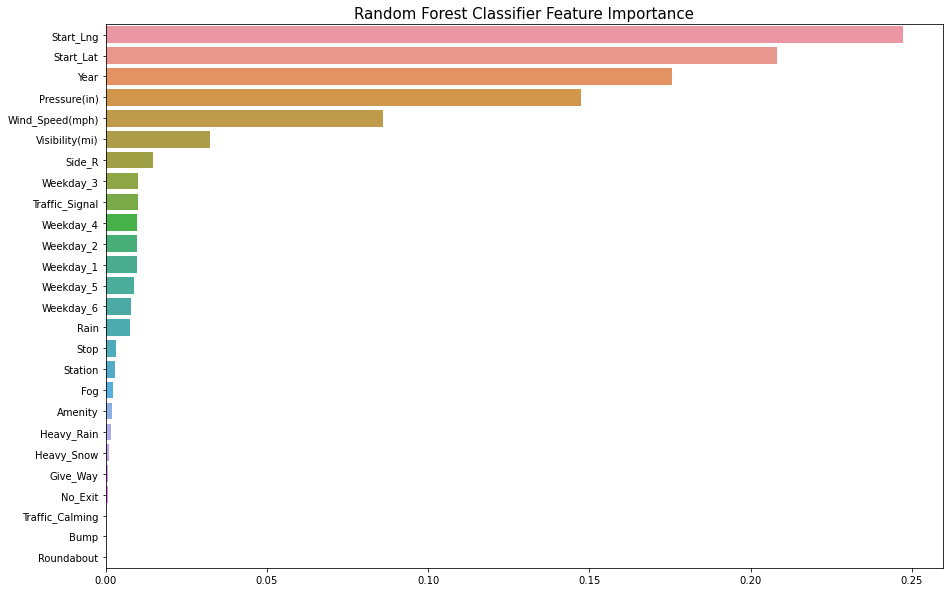

In [69]:
importances = pd.DataFrame(np.zeros((X_train_res.shape[1], 1)), columns=['importance'], index=df.drop('Severity4',axis=1).columns)

importances.iloc[:,0] = clf_rf.best_estimator_.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

plt.show()

Vegem que les features principals que ens permeten fer les prediccions segueixen essent les mateixes.

<a id="5"></a>
# 5. Resultats i anàlisi de les mètriques
Finalment fem una comparativa dels diferents models.

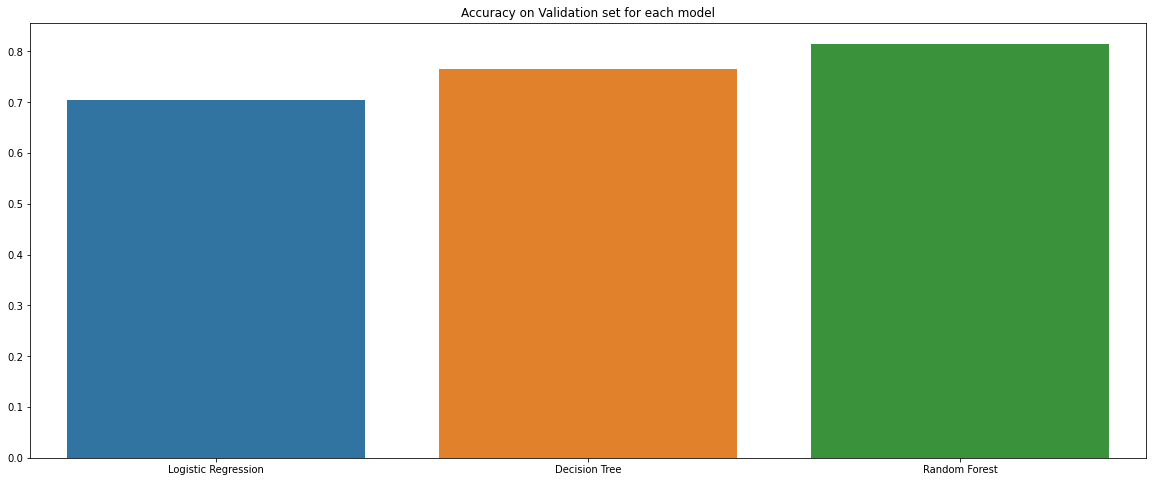

In [70]:

plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(x=list(range(len(accuracy))),y= list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()

Podem observar les *accuracies* de les diferents regressions. El model que ha aconseguit fer més bona predicció ha estat el *Random Forest* amb un 80% d'accuracy. 

Com que el nostre dataset era *imbalanced* i.e. tenia les classes desaquilibrades, fem una visió a la **Precission-Recall curve** ja que és una mesura útil per mesurar l'èxit de la predicció quan les classes estan molt desequilibrades.

La corba mostra la compensació entre precission i recall per a diferents llindars. Les puntuacions altes per a tots dos mostren que el classificador està retornant resultats precisos (alta precisió), així com la majoria de tots els resultats positius (recall alt).

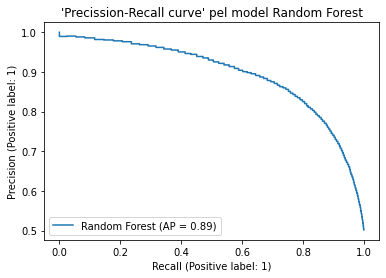

In [71]:
display = PrecisionRecallDisplay.from_estimator(
    clf_rf, X_test_res, y_test_res, name="Random Forest"
)
_ = display.ax_.set_title("'Precission-Recall curve' pel model Random Forest")